1. use pandas and csv to save data
2. [multi processing](https://www.maxlist.xyz/2020/03/20/multi-processing-pool/)
3. draw data
4. 用更長的時間模擬

In [3]:
import numpy as np
import pandas as pd
import h5py
import csv
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from matplotlib import cm 
import cv2
import time

from math import sqrt
from joblib import Parallel, delayed

from multiprocessing import Process, Pool
import os, time

from IPython.display import clear_output

import FR_plot as fplot
import CRIREL as crirel


%load_ext autoreload
%autoreload 2

plt.ioff() # turn off interactive

# 資料夾確認

In [4]:
swap_name      = "wei"
FR_data_name   = "FR_data"
Null_data_name = "Nullcline_data"
phase_fig_name = "phase"

# ======================================================================================|
Folder_name    = swap_name + "/"

FR_path        = Folder_name + FR_data_name + "/"
Nullcline_path = Folder_name + Null_data_name + "/"
Fig_path       = Folder_name + phase_fig_name + "/"

print(f"Nullcline_path: {Nullcline_path}")

Nullcline_path: wei/Nullcline_data/


# 畫單一

### 讀資料

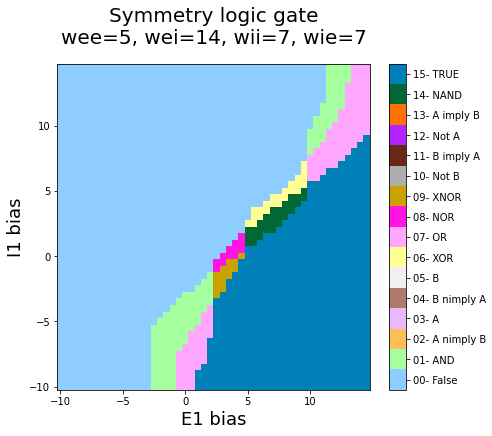

save_path=wei/phase/


In [5]:
wei_list = np.arange(0, 21)
delta_e_list = np.arange(0, 10.5, 0.5)
delta_e_list = [0]

for delta_e in delta_e_list:
    bo = 0
    wee = 5
    wei = 14 # 14
    wie = 7
    wii = 7
    wo = 5
    stim = 5
    T = 400
    a = 1.6
    theta = 4
    tau = 1
    bias = 10
    dif = 0.5
    delta_e = 0
    delta_i = 0

    fname = str(bo)+"_"+str(wee).zfill(2)+"_"+str(wei).zfill(2)+"_"+str(wie).zfill(2)+"_"+str(wii).zfill(2)+"_"+str(wo)+"_"+\
            str(stim)+"_"+str(T)+"_"+str(a)+ "_"+str(theta)+ "_"+str(tau)+ "_"+str(bias)+ "_"+str(dif)+ "_"+\
            str(delta_e)+"_"+str(delta_i)

    # 讀資料
    logic_label_all_read = np.load(FR_path + fname+"_logic_label_16.npy")

    # 存圖路徑 建立目錄
    save_path  = Fig_path
    try:                             ## 使用 try 建立目錄
        os.makedirs(save_path)
        print(f"建立目錄 {save_path}")
    except FileExistsError:          # 檔案已存在的例外處理
        print("檔案已存在。")
        
    
    # 處理變數
    fname_split = fname.split("_")
    fname_split_float = [float(para) for para in fname_split]
    bo, wee, wei, wie, wii, wo, stim, T, a, theta, tau, bias, dif, delta_e, delta_i = fname_split_float
    
    
    # ============== plot =============================
    clear_output()
    Tit = swap_name + " = " + str(wei)
    Tit = f"Symmetry logic gate\nwee={wee:.0f}, wei={wei:.0f}, wii={wii:.0f}, wie={wie:.0f}"
    figname = fname + "_phase"
    fplot.plot_phase_16(Tit, figname, bias, dif, logic_label_all_read, save_path, False)
        
    print(f"save_path={save_path}")

# 03 plot adder

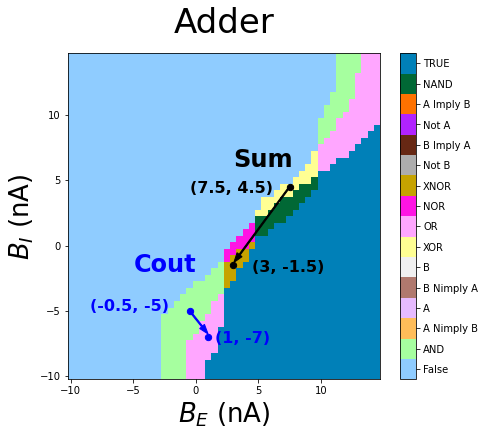

In [6]:
def plot_phase_16(Tit, figname, bias, dif, Z, path="phase/", plot_bool=False):
    
    Xlabel = r"$B_{E}$" + " (nA)"
    Ylabel = r"$B_{I}$" + " (nA)"
    
    FZ =24
    e_bias_list = np.arange(-bias, bias*1.5, dif)
    i_bias_list = np.arange(-bias, bias*1.5, dif)
    
    
    name_list = ["False", "AND", "A Nimply B", "A", "B Nimply A", "B", "XOR", "OR",
             "NOR", "XNOR", "Not B", "B Imply A", "Not A", "A Imply B", "NAND", "TRUE"]

    cmap_list = ['#8fccff', '#a6ff9f', '#ffbd59', '#e6baff', '#b0796e', '#f0f0f0', '#ffff93', '#ffa6ff',
                 '#ff14e4', '#c6a300', '#adadad', '#672814', '#b123ff', '#ff7200', '#016835', '#0080b8']
    label_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    
    fig, ax = plt.subplots(1, 1, figsize=(7,6), facecolor="white")
    # left
    new_inferno = cm.get_cmap('inferno', 16)
    custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", 
                                                                  ["red", "blue", "yellow"])

    cmap = ListedColormap(cmap_list)
    
    
    c = ax.pcolormesh(e_bias_list, i_bias_list, Z, 
                      cmap= cmap, 
                      vmin=-0.5, vmax=15.5,
                      # edgecolors='k', 
                      linewidths=0.5)
    cbar = fig.colorbar(c, ticks=label_list)
    cbar.ax.set_yticklabels(name_list)  # vertically oriented colorbar
    
    # point 
    plt.text(-5, -2, "Cout", fontsize=24, weight="bold", c="b")
    plt.scatter(-0.5, -5, s=40, c="b")
    plt.text(-0.5-8, -5, f"({-0.5}, {-5})", fontsize=16, weight="bold", c="b")
    plt.scatter(   1, -7, s=40, c="b")
    plt.text(1+0.5, -7-0.5, f"({1}, {-7})", fontsize=16, weight="bold", c="b")

    plt.arrow(-0.5, -5, 1, -1.2, head_width=0.5, width=0.1, ec ='b', color='b')
    
    
    # point 
    C="k"
    plt.text(3, 6, "Sum", fontsize=24, weight="bold", c=C)
    plt.scatter( 7.5,  4.5, s=40, c=C)
    plt.text(7.5-8,  4.5-0.5, f"({7.5}, {4.5})", fontsize=16, weight="bold", c=C)
    plt.scatter(   3, -1.5, s=40, c=C)
    plt.text(3+1.5,  -1.5-0.5, f"({3}, {-1.5})", fontsize=16, weight="bold", c=C)
    plt.arrow(7.5, 4.5, -4, -5.2, head_width=0.5, width=0.1, ec=C, color=C)
    
    # lim
    ax.set_title(Tit, fontsize=FZ+10, pad=20)
    ax.set_xlim(-bias-dif/2, bias*1.5-dif/2)
    ax.set_ylim(-bias-dif/2, bias*1.5-dif/2)
    ax.set_xlabel(Xlabel, fontsize=FZ+2)
    ax.set_ylabel(Ylabel, fontsize=FZ+2)
#     ax.set_xlabel(r'$E bias_{E1}$', fontsize=FZ+2)
#     ax.set_ylabel(r'$I bias_{I1}$', fontsize=FZ+2)
    if plot_bool:
        plt.savefig(path + figname + ".png")
    plt.show()
    # plt.close()
    
clear_output()
Tit = swap_name + " = " + str(wei)
Tit = f"Symmetry logic gate\nwee={wee:.0f}, wei={wei:.0f}, wii={wii:.0f}, wie={wie:.0f}"
Tit = f"Symmetry logic gate, Adder\nwee={wee:.0f}, wei={wei:.0f}, wii={wii:.0f}, wie={wie:.0f}"
Tit = "Adder"


figname = fname + "_phase"
plot_phase_16(Tit, figname, bias, dif, logic_label_all_read, save_path, False)

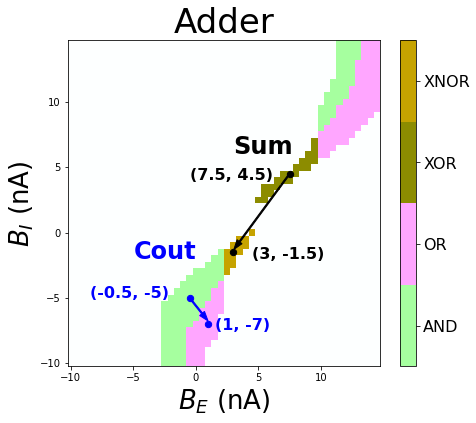

In [10]:
def plot_phase_16(Tit, figname, bias, dif, Z, path="phase/", plot_bool=False):
    
    Xlabel = r"$B_{E}$" + " (nA)"
    Ylabel = r"$B_{I}$" + " (nA)"
    
    FZ =24
    e_bias_list = np.arange(-bias, bias*1.5, dif)
    i_bias_list = np.arange(-bias, bias*1.5, dif)


    
    fig, ax = plt.subplots(1, 1, figsize=(7,6), facecolor="white")
    # left

    
    # ==========================================================
    label_list = [0,  1,  2,  3]
    name_list = ["AND", "OR", "XOR", "XNOR"]
    cmap_list = ['#a6ff9f', '#ffa6ff', '#8C8C00', "#c6a300"]
    
    cmap = ListedColormap(cmap_list)
    # left
    
    c = ax.pcolormesh(e_bias_list, i_bias_list, logic_label_all_read, 
                      cmap=cmap, 
                      vmin=-0.5, vmax=3.5,
                      linewidths=0.5)
    cbar = fig.colorbar(c, ticks=label_list)
    cbar.ax.set_yticklabels(name_list, fontsize=16)  # vertically oriented colorbar
     # ==========================================================
    
    name_list = ["False", "AND", "A Nimply B", "A", "B Nimply A", "B", "XOR", "OR",
             "NOR", "XNOR", "Not B", "B Imply A", "Not A", "A Imply B", "NAND", "TRUE"]

    cmap_list = ['#FDFFFF', '#a6ff9f', '#FDFFFF', '#FDFFFF', '#FDFFFF', '#FDFFFF', '#8C8C00', '#ffa6ff',
                 '#FDFFFF', '#c6a300', '#FDFFFF', '#FDFFFF', '#FDFFFF', '#FDFFFF', '#FDFFFF', '#FDFFFF']
    label_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    
    
    cmap = ListedColormap(cmap_list)
    
    
    c = ax.pcolormesh(e_bias_list, i_bias_list, Z, 
                      cmap= cmap, 
                      vmin=-0.5, vmax=15.5,
                      # edgecolors='k', 
                      linewidths=0.5)
#     cbar = fig.colorbar(c, ticks=label_list)
#     cbar.ax.set_yticklabels(name_list)  # vertically oriented colorbar
    
    # point 
    plt.text(-5, -2, "Cout", fontsize=24, weight="bold", c="b")
    plt.scatter(-0.5, -5, s=40, c="b")
    plt.text(-0.5-8, -5, f"({-0.5}, {-5})", fontsize=16, weight="bold", c="b")
    plt.scatter(   1, -7, s=40, c="b")
    plt.text(1+0.5, -7-0.5, f"({1}, {-7})", fontsize=16, weight="bold", c="b")

    plt.arrow(-0.5, -5, 1, -1.2, head_width=0.5, width=0.1, ec ='b', color='b')
    
    
    # point 
    C="k"
    plt.text(3, 6, "Sum", fontsize=24, weight="bold", c=C)
    plt.scatter( 7.5,  4.5, s=40, c=C)
    plt.text(7.5-8,  4.5-0.5, f"({7.5}, {4.5})", fontsize=16, weight="bold", c=C)
    plt.scatter(   3, -1.5, s=40, c=C)
    plt.text(3+1.5,  -1.5-0.5, f"({3}, {-1.5})", fontsize=16, weight="bold", c=C)
    plt.arrow(7.5, 4.5, -4, -5.2, head_width=0.5, width=0.1, ec=C, color=C)
    
    # lim
    ax.set_title(Tit, fontsize=FZ+10)
    ax.set_xlim(-bias-dif/2, bias*1.5-dif/2)
    ax.set_ylim(-bias-dif/2, bias*1.5-dif/2)
    ax.set_xlabel(Xlabel, fontsize=FZ+2)
    ax.set_ylabel(Ylabel, fontsize=FZ+2)
#     ax.set_xlabel(r'$E bias_{E1}$', fontsize=FZ+2)
#     ax.set_ylabel(r'$I bias_{I1}$', fontsize=FZ+2)
    if plot_bool:
        plt.savefig(path + figname + ".png")
    plt.show()
    # plt.close()
    
clear_output()
Tit = swap_name + " = " + str(wei)
Tit = f"Symmetry logic gate\nwee={wee:.0f}, wei={wei:.0f}, wii={wii:.0f}, wie={wie:.0f}"
Tit = f"Symmetry logic gate, Adder\nwee={wee:.0f}, wei={wei:.0f}, wii={wii:.0f}, wie={wie:.0f}"
Tit = "Adder"


figname = fname + "_phase"
plot_phase_16(Tit, figname, bias, dif, logic_label_all_read, save_path, False)

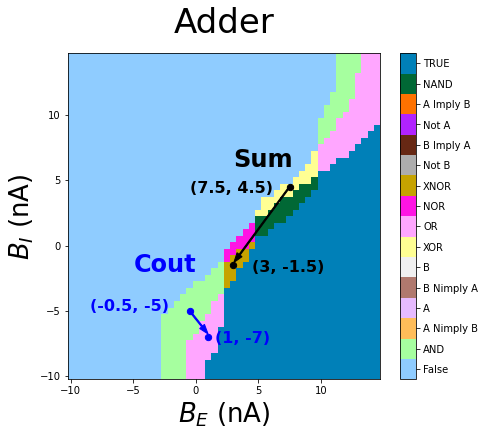

In [13]:
def plot_phase_16(Tit, figname, bias, dif, Z, path="phase/", plot_bool=False):
    
    Xlabel = r"$B_{E}$" + " (nA)"
    Ylabel = r"$B_{I}$" + " (nA)"
    
    FZ =24
    e_bias_list = np.arange(-bias, bias*1.5, dif)
    i_bias_list = np.arange(-bias, bias*1.5, dif)
    
    
    name_list = ["False", "AND", "A Nimply B", "A", "B Nimply A", "B", "XOR", "OR",
             "NOR", "XNOR", "Not B", "B Imply A", "Not A", "A Imply B", "NAND", "TRUE"]

    cmap_list = ['#8fccff', '#a6ff9f', '#ffbd59', '#e6baff', '#b0796e', '#f0f0f0', '#ffff93', '#ffa6ff',
                 '#ff14e4', '#c6a300', '#adadad', '#672814', '#b123ff', '#ff7200', '#016835', '#0080b8']
    label_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    
    fig, ax = plt.subplots(1, 1, figsize=(7,6), facecolor="white")
    # left
    new_inferno = cm.get_cmap('inferno', 16)
    custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", 
                                                                  ["red", "blue", "yellow"])

    cmap = ListedColormap(cmap_list)
    
    
    c = ax.pcolormesh(e_bias_list, i_bias_list, Z, 
                      cmap= cmap, 
                      vmin=-0.5, vmax=15.5,
                      # edgecolors='k', 
                      linewidths=0.5)
    cbar = fig.colorbar(c, ticks=label_list)
    cbar.ax.set_yticklabels(name_list)  # vertically oriented colorbar
    
    # point 
    plt.text(-5, -2, "Cout", fontsize=24, weight="bold", c="b")
    plt.scatter(-0.5, -5, s=40, c="b")
    plt.text(-0.5-8, -5, f"({-0.5}, {-5})", fontsize=16, weight="bold", c="b")
    plt.scatter(   1, -7, s=40, c="b")
    plt.text(1+0.5, -7-0.5, f"({1}, {-7})", fontsize=16, weight="bold", c="b")

    plt.arrow(-0.5, -5, 1, -1.2, head_width=0.5, width=0.1, ec ='b', color='b')
    
    
    # point 
    C="k"
    plt.text(3, 6, "Sum", fontsize=24, weight="bold", c=C)
    plt.scatter( 7.5,  4.5, s=40, c=C)
    plt.text(7.5-8,  4.5-0.5, f"({7.5}, {4.5})", fontsize=16, weight="bold", c=C)
    plt.scatter(   3, -1.5, s=40, c=C)
    plt.text(3+1.5,  -1.5-0.5, f"({3}, {-1.5})", fontsize=16, weight="bold", c=C)
    plt.arrow(7.5, 4.5, -4, -5.2, head_width=0.5, width=0.1, ec=C, color=C)
    
    # lim
    ax.set_title(Tit, fontsize=FZ+10, pad=20)
    ax.set_xlim(-bias-dif/2, bias*1.5-dif/2)
    ax.set_ylim(-bias-dif/2, bias*1.5-dif/2)
    ax.set_xlabel(Xlabel, fontsize=FZ+2)
    ax.set_ylabel(Ylabel, fontsize=FZ+2)
#     ax.set_xlabel(r'$E bias_{E1}$', fontsize=FZ+2)
#     ax.set_ylabel(r'$I bias_{I1}$', fontsize=FZ+2)

    plt.show()
    
clear_output()
Tit = swap_name + " = " + str(wei)
Tit = f"Symmetry logic gate\nwee={wee:.0f}, wei={wei:.0f}, wii={wii:.0f}, wie={wie:.0f}"
Tit = f"Symmetry logic gate, Adder\nwee={wee:.0f}, wei={wei:.0f}, wii={wii:.0f}, wie={wie:.0f}"
Tit = "Adder"


figname = fname + "_phase"
plot_phase_16(Tit, figname, bias, dif, logic_label_all_read, save_path, False)

# 04 gif

In [5]:
# 讀單張

image_path = save_path

allFileList = os.listdir(image_path)
allFileList.sort()
file_name = allFileList[0]

print(f"file_name = {file_name}")

file_name = delta_i=00.0_16.png


In [6]:
import imageio
import imageio.v2
with imageio.get_writer(save_path+'delta_i.gif', mode='I', fps=5) as writer:
    
    for num, filename in enumerate(allFileList):
        # rewrite
        image_w = imageio.v2.imread(image_path + filename)
        writer.append_data(image_w)
        clear_output()
print("finish")

finish


# 畫圖
1. [Choosing and Creating Colormaps in Matplotlib](https://towardsdatascience.com/creating-colormaps-in-matplotlib-4d4de78a04b8)
2. [Custom Color Maps in Matplotlib](https://www.youtube.com/watch?v=Gme57y76tlk&ab_channel=NeuralNine)
3. [Creating Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py)
4. [List of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

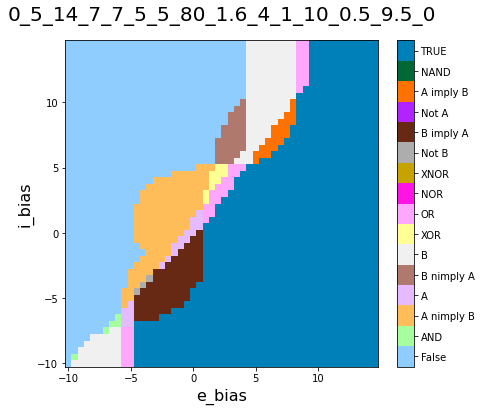

finish


In [153]:
def plot_phase_16(fname, bias, dif, Z, path="phase/"):
    
    FZ =16
    e_bias_list = np.arange(-bias, bias*1.5, dif)
    i_bias_list = np.arange(-bias, bias*1.5, dif)
    
    name_list = ["False", "AND", "A nimply B", "A", "B nimply A", "B", "XOR", "OR",
             "NOR", "XNOR", "Not B", "B imply A", "Not A", "A imply B", "NAND", "TRUE"]

    cmap_list = ['#8fccff', '#a6ff9f', '#ffbd59', '#e6baff', '#b0796e', '#f0f0f0', '#ffff93', '#ffa6ff',
                 '#ff14e4', '#c6a300', '#adadad', '#672814', '#b123ff', '#ff7200', '#016835', '#0080b8']
    label_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    
    fig, ax = plt.subplots(1, 1, figsize=(7,6))
    # left
    new_inferno = cm.get_cmap('inferno', 16)
    custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", 
                                                                  ["red", "blue", "yellow"])

    cmap = ListedColormap(cmap_list)
    
    
    c = ax.pcolormesh(e_bias_list, i_bias_list, Z, 
                      cmap= cmap, 
                      vmin=-0.5, vmax=15.5,
                      # edgecolors='k', 
                      linewidths=0.5)
    cbar = fig.colorbar(c, ticks=label_list)
    cbar.ax.set_yticklabels(name_list)  # vertically oriented colorbar
    
    # lim
    ax.set_title(fname, fontsize=FZ+4, pad=20)
    ax.set_xlim(-bias-dif/2, bias*1.5-dif/2)
    ax.set_ylim(-bias-dif/2, bias*1.5-dif/2)
    ax.set_xlabel('e_bias', fontsize=FZ)
    ax.set_ylabel('i_bias', fontsize=FZ)
    
    #plt.savefig(path+fname+".png")
    plt.show()
    # plt.close()
    
# ============== plot =============================
clear_output()
plot_phase_16(fname, bias, dif, logic_label_all_read, File_path)

print("finish")

# old

##  重算16種 logic scire

In [ ]:
##  重算16種 logic scire
delta_i_list = np.arange(0, 10.5, 0.5)


for delta_i in delta_i_list:
    bo = 0
    wee = 5
    wei = 14 # 14
    wie = 7
    wii = 7
    wo = 5
    stim = 5
    T = 80
    a = 1.6
    theta = 4
    tau = 1
    bias = 10
    dif = 0.5
    delta_e = 0
    # delta_i = 0

    fname = str(bo)+"_"+str(wee)+"_"+str(wei)+"_"+str(wie)+"_"+str(wii)+"_"+str(wo)+"_"+\
            str(stim)+"_"+str(T)+"_"+str(a)+ "_"+str(theta)+ "_"+str(tau)+ "_"+str(bias)+ "_"+str(dif)+ "_"+\
            str(delta_e)+"_"+str(delta_i)


    File_path = Folder_path + fname+ "/"
    # 讀資料
    logic_FR_all_read    = np.load(File_path + fname+"_logic_FR.npy")
    logic_label_all_read = np.load(File_path + fname+"_logic_label.npy")

    # 處理變數
    fname_split = fname.split("_")
    fname_split_float = [float(para) for para in fname_split]
    bo, wee, wei, wie, wii, wo, stim, T, a, theta, tau, bias, dif, delta_e, delta_i = fname_split_float



    # 重新算 logic score

    e_bias_list = np.arange(-bias, bias*1.5, dif)
    i_bias_list = np.arange(-bias, bias*1.5, dif)

    logic_label_all = np.zeros([len(i_bias_list), len(e_bias_list)])      # logic type

    for e, e_bias in enumerate(e_bias_list):
        for i, i_bias in enumerate(i_bias_list): 
             # print(f"e_bias={e_bias}, i_bias={i_bias}")

            logic_FR = logic_FR_all_read[i, e, :] 
            logic_score = sum( np.where(np.array(logic_FR)>0.5, [2**i for i in range(0, 4)], 0) )
            logic_label_all[i, e] = crirel.interval_logic_list_16(logic_score)


    np.save(File_path + fname+"_logic_label_16", logic_label_all)
    print("finish")
    clear_output()